<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
جرم‌شناسی
</font>
</h1>




<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هدف شما در این مسئله، ایجاد یک مدل پیش‌بینی است که می‌تواند از داده‌های تاریخی حوادث جدید را در یکی از چندین دسته جرم طبقه‌بندی کند. این مدل باید به سازمان‌های مجری قانون کمک کند تا الگوهای رفتار مجرمانه را شناسایی کرده و تصمیمات آگاهانه‌تری در مورد استراتژی‌های پیشگیری از جرم در لس‌آنجلس بگیرند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزشی شامل 84113 سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|DR_NO| یک شناسه‌ی منحصر به فرد برای هر گزارش جرم|
|Date Rptd| تاریخ گزارش جنایت|
|DATE OCC| تاریخ وقوع جرم|
|TIME OCC| زمان وقوع جرم|
|AREA| کد منطقه‌ای که جرم در آن رخ داده است|
|AREA NAME| نام منطقه‌ای که جرم در آن رخ داده است|
|Rpt Dist No| شماره‌ی منطقه‌ی گزارش‌دهنده|
|Crm Cd| کد جرم که نشان‌دهنده‌ی دسته‌ی جرم است (این ستون، متغیر هدف است)|
|Crm Cd Desc| شرح جرم|
|Mocodes| کدهای نشان‌دهنده‌ی روش مورد استفاده برای ارتکاب جرم|
|Vict Age| سن قربانی|
|Vict Sex| جنسیت قربانی|
|Vict Descent| قومیت/تبار قربانی|
|Premis Cd| کد نوع محل وقوع جرم|
|Premis Desc| شرحی از محل|
|Weapon Used Cd| کد نوع سلاح مورد استفاده در جرم|
|Weapon Desc| شرحی از سلاح مورد استفاده|
|Status| وضعیت پرونده (به عنوان مثال، در دست بررسی، بسته‌شده)|
|Status Desc| شرح وضعیت پرونده|
|Crm Cd 1، Crm Cd 2، Crm Cd 3، Crm Cd 4| کدهای جرم اضافی در صورتی که حادثه شامل چندین جرم باشد|
|LOCATION| طول و عرض جغرافیایی جنایت|
|Cross Street| نزدیکترین چهارراه به محل وقوع جرم|
|LAT| مختصات عرض جغرافیایی جرم|
|LON| مختصات طول جغرافیایی جرم|

    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه‌داده‌ی آزمایش نیز مانند مجموعه‌ی آموزش است با این تفاوت که ستون <code>Crm Cd</code> که متغیر هدف مسئله است را در خود ندارد. همچنین ستون‌های <code>Crm Cd 1</code> و <code>Crm Cd 2</code> و  <code>Crm Cd 3</code> و <code>Crm Cd 4</code> و <code>Crm Cd Desc</code> که اطلاعات مستقیم در مورد متغیر هدف دارند را نیز در خود ندارد. مجموعه‌داده‌ی آزمایش 9346 سطر و 21 ستون دارد.
</font>
</p>


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'): #list file on your dataset path 
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import pandas as pd

df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84113 entries, 0 to 84112
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           84113 non-null  int64  
 1   Date Rptd       84113 non-null  object 
 2   DATE OCC        84113 non-null  object 
 3   TIME OCC        84113 non-null  int64  
 4   AREA            84113 non-null  int64  
 5   AREA NAME       84113 non-null  object 
 6   Rpt Dist No     84113 non-null  int64  
 7   Crm Cd          84113 non-null  int64  
 8   Crm Cd Desc     84113 non-null  object 
 9   Mocodes         70368 non-null  object 
 10  Vict Age        84113 non-null  int64  
 11  Vict Sex        70589 non-null  object 
 12  Vict Descent    70588 non-null  object 
 13  Premis Cd       84111 non-null  float64
 14  Premis Desc     84082 non-null  object 
 15  Weapon Used Cd  29721 non-null  float64
 16  Weapon Desc     29721 non-null  object 
 17  Status          84113 non-null 

In [11]:
df.shape

(84113, 27)

In [9]:
df.describe()
#statistic property of this field

,DR_NO,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.411300e+04,84113.000000,84113.000000,84113.000000,84113.000000,84113.000000,84111.000000,29721.000000,84111.000000,5285.000000,87.000000,3.000000,84113.000000,84113.000000
mean,2.017194e+08,1358.822869,10.832000,1129.188913,474.478677,30.252434,279.611965,371.507722,474.421990,954.541911,976.563218,975.333333,33.994580,-118.079535
std,3.491388e+06,651.942509,6.012507,601.265826,180.767706,21.894780,212.161546,117.015297,180.706534,129.257310,67.899670,39.259818,1.642606,5.692973
min,8.170000e+02,1.000000,1.000000,101.000000,210.000000,-2.000000,101.000000,101.000000,210.000000,220.000000,626.000000,930.000000,0.000000,-118.667600
25%,2.006099e+08,920.000000,6.000000,632.000000,330.000000,0.000000,101.000000,400.000000,330.000000,998.000000,998.000000,964.000000,34.010300,-118.430900
50%,2.012066e+08,1445.000000,11.000000,1151.000000,440.000000,31.000000,122.000000,400.000000,440.000000,998.000000,998.000000,998.000000,34.058700,-118.322200
75%,2.017067e+08,1900.000000,16.000000,1623.000000,624.000000,46.000000,501.000000,400.000000,624.000000,998.000000,998.000000,998.000000,34.164900,-118.273900
max,2.420047e+08,2359.000000,21.000000,2198.000000,930.000000,99.000000,971.000000,516.000000,930.000000,999.000000,998.000000,998.000000,34.329300,0.000000


In [10]:
df['Vict Age'].describe()

count    84113.000000
mean        30.252434
std         21.894780
min         -2.000000
25%          0.000000
50%         31.000000
75%         46.000000
max         99.000000
Name: Vict Age, dtype: float64

In [ ]:
df['Vict Age'].mean()

np.float64(1358.8228692354332)

In [12]:
df['Vict Age'].median()

np.float64(31.0)

In [13]:
#vict age statistic gender
print("vict age gender : \n" ,df['Vict Sex'].value_counts())

# ۲. تحلیل محدوده سنی قربانیان
print("mean vict age\n", df['Vict Age'].mean())
print(" mideian vict age\n", df['Vict Age'].median())
print("lowest vict age\n", df['Vict Age'].min())
print("hieghest vict age\n", df['Vict Age'].max())

# ۳. پرتکرارترین انواع جرم

print(" most common crm \n",df['Crm Cd Desc'].value_counts().head(10))


vict age gender : 
 Vict Sex
M    36101
F    28890
X     5591
H        7
Name: count, dtype: int64
mean vict age
 30.252434225387276
 mideian vict age
 31.0
lowest vict age
 -2
hieghest vict age
 99
 most common crm 
 Crm Cd Desc
VEHICLE - STOLEN                                           11214
BATTERY - SIMPLE ASSAULT                                    8829
BURGLARY FROM VEHICLE                                       6951
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6937
BURGLARY                                                    6787
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              6189
THEFT PLAIN - PETTY ($950 & UNDER)                          5771
INTIMATE PARTNER - SIMPLE ASSAULT                           5755
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             5243
THEFT OF IDENTITY                                           5057
Name: count, dtype: int64


 VISUAL vict age 

In [18]:
df['Status'].value_counts()

Status
IC    66845
AO     9488
AA     7368
JA      299
JO      113
Name: count, dtype: int64

In [19]:
import pandas as pd

df = pd.read_csv('train.csv')

print("head record :\n", df.head())

print("tail record:\n", df.tail())

print(" general info:\n", df.info())

print(" numberic colum:\n", df.describe())
print( "none numberic  colum:\n", df.describe(include=['O']))

head record :
        DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  201516407  10/17/2020 12:00:00 AM  10/15/2020 12:00:00 AM      2100    15   
1  200700622  03/24/2020 12:00:00 AM  03/24/2020 12:00:00 AM      1430     7   
2  200312712  06/14/2020 12:00:00 AM  06/14/2020 12:00:00 AM      1030     3   
3  201515083  09/12/2020 12:00:00 AM  09/08/2020 12:00:00 AM      1528    15   
4  200817552  12/14/2020 12:00:00 AM  12/14/2020 12:00:00 AM       805     8   

     AREA NAME  Rpt Dist No  Crm Cd  \
0  N Hollywood         1581     510   
1     Wilshire          705     626   
2    Southwest          362     230   
3  N Hollywood         1585     341   
4      West LA          853     740   

                                         Crm Cd Desc  \
0                                   VEHICLE - STOLEN   
1                  INTIMATE PARTNER - SIMPLE ASSAULT   
2     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
3  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOW

In [20]:
#vict age statistic gender
print("vict age gender : \n" ,df['Vict Sex'].value_counts())

# ۲. تحلیل محدوده سنی قربانیان
print("mean vict age\n", df['Vict Age'].mean())
print(" mideian vict age\n", df['Vict Age'].median())
print("lowest vict age\n", df['Vict Age'].min())
print("hieghest vict age\n", df['Vict Age'].max())

# ۳. پرتکرارترین انواع جرم

print(" most common crm \n",df['Crm Cd Desc'].value_counts().head(10))


vict age gender : 
 Vict Sex
M    36101
F    28890
X     5591
H        7
Name: count, dtype: int64
mean vict age
 30.252434225387276
 mideian vict age
 31.0
lowest vict age
 -2
hieghest vict age
 99
 most common crm 
 Crm Cd Desc
VEHICLE - STOLEN                                           11214
BATTERY - SIMPLE ASSAULT                                    8829
BURGLARY FROM VEHICLE                                       6951
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6937
BURGLARY                                                    6787
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              6189
THEFT PLAIN - PETTY ($950 & UNDER)                          5771
INTIMATE PARTNER - SIMPLE ASSAULT                           5755
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             5243
THEFT OF IDENTITY                                           5057
Name: count, dtype: int64


In [21]:

# ۱. ارتباط بین نوع جرم و جنسیت قربانی
crossexample = pd.crosstab(df['Crm Cd Desc'], df['Vict Sex'])
print("Crm Cd Desc vs Vict gender \n")
print(crossexample)

# ۲. میانگین سن قربانیان بر اساس نوع جرم
age_by_crime = df.groupby('Crm Cd Desc')['Vict Age'].mean()
print("Mean Vict age vs Crm Cd Desc: \n")
print(age_by_crime.sort_values(ascending=False).head(10))

# ۳. بررسی سلاح مورد استفاده در انواع جرایم
weapon_by_crime = df.groupby(['Crm Cd Desc', 'Weapon Desc']).size()
print(" Crm Cd Desc vs Weapon Desc\n")
print(weapon_by_crime.head(10))

Crm Cd Desc vs Vict gender 

Vict Sex                                               F  H     M     X
Crm Cd Desc                                                            
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      1665  1  4416   104
BATTERY - SIMPLE ASSAULT                            4262  1  4526    39
BURGLARY                                            1765  0  3449  1569
BURGLARY FROM VEHICLE                               2951  2  3841   154
CRIMINAL THREATS - NO WEAPON DISPLAYED              1154  0  1106    37
INTIMATE PARTNER - SIMPLE ASSAULT                   4375  0  1372     8
ROBBERY                                              970  0  2324   477
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...   905  0  1517   141
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)     1174  0  1644    77
THEFT OF IDENTITY                                   2416  1  2590    48
THEFT PLAIN - PETTY ($950 & UNDER)                  2393  1  2789   586
THEFT-GRAND ($950.01 & OVER)EXCPT,G

CRIME DATA VISUALL ( relate to above code)
Visualizations:

Heatmap - Crime type vs victim gender

Horizontal bar chart - Average victim age by crime type

Pie chart - Top weapons used

Bar chart - Crime distribution by time or area

1. Crime Type vs Victim gender Relationship:
Top 5 crimes by frequency:
Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                   8828
BURGLARY FROM VEHICLE                                      6948
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    6933
BURGLARY                                                   6783
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             6186
dtype: int64
--------------------------------------------------
2. Average Victim Age by Crime Type:
Top 10 crimes by average victim age:
1. THEFT OF IDENTITY: 42.3 years
2. BATTERY - SIMPLE ASSAULT: 40.4 years
3. THEFT FROM MOTOR VEHICLE - GRAND ($950.0: 39.0 years
4. CRIMINAL THREATS - NO WEAPON DISPLAYED: 38.8 years
5. BURGLARY FROM VEHICLE: 37.7 years
6. ASSAULT WITH DEADLY WEAPON, AGGRAVATED A: 36.3 years
7. THEFT PLAIN - PETTY ($950 & UNDER): 35.8 years
8. THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,F: 34.5 years
9. VANDALISM - MISDEAMEANOR ($399 OR UNDER): 34.4 years
10. INTIMATE PARTNER

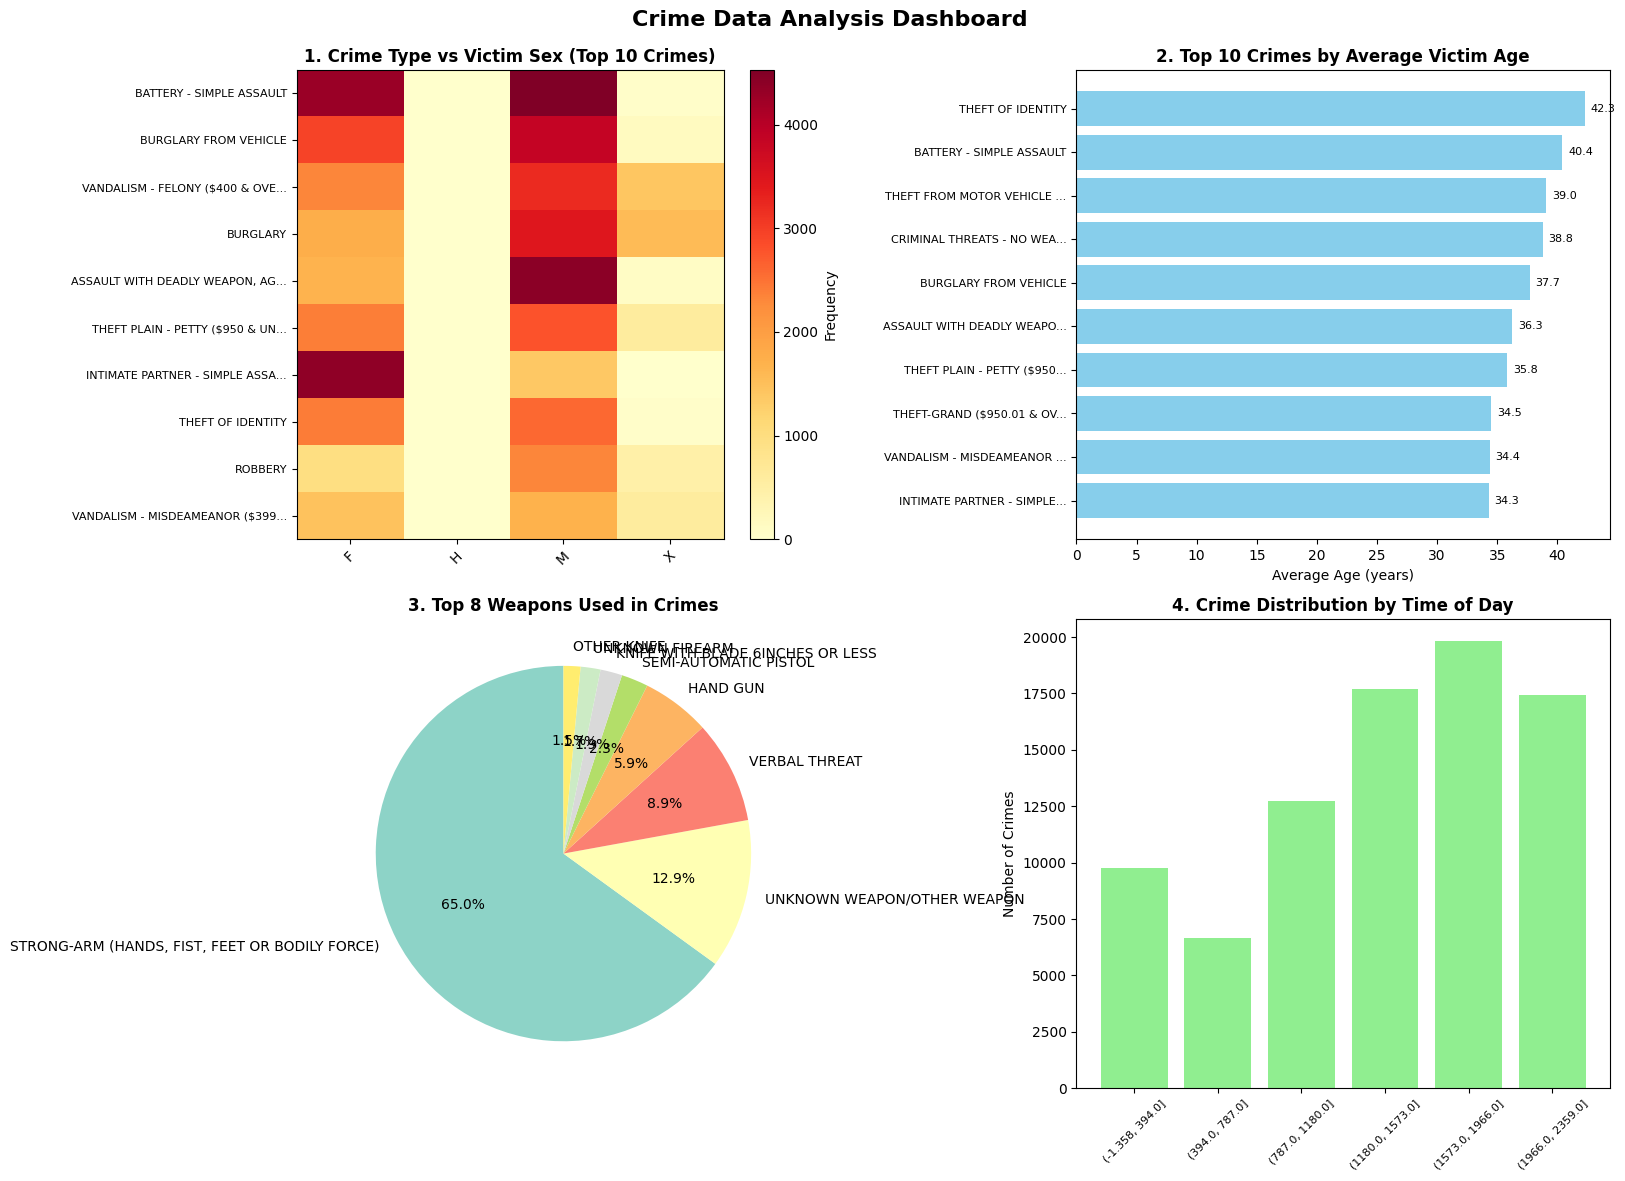


SUMMARY STATISTICS
Total records: 84,113
Number of crime types: 15
Average victim age: 30.3 years
Most common crime: VEHICLE - STOLEN


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Crime Data Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Crime Type and Victim gender Crosstab (Heatmap)
print("1. Crime Type vs Victim gender Relationship:")
crossexample = pd.crosstab(df['Crm Cd Desc'], df['Vict Sex'])
print("Top 5 crimes by frequency:")
print(crossexample.sum(axis=1).sort_values(ascending=False).head())
print("-" * 50)

top_crimes = crossexample.sum(axis=1).sort_values(ascending=False).head(10).index
crossexample_top = crossexample.loc[top_crimes]

im = axes[0, 0].imshow(crossexample_top.values, cmap='YlOrRd', aspect='auto')
axes[0, 0].set_title('1. Crime Type vs Victim Sex (Top 10 Crimes)', fontweight='bold')
axes[0, 0].set_xticks(range(len(crossexample_top.columns)))
axes[0, 0].set_xticklabels(crossexample_top.columns, rotation=45)
axes[0, 0].set_yticks(range(len(crossexample_top.index)))
axes[0, 0].set_yticklabels([label[:30] + '...' if len(label) > 30 else label for label in crossexample_top.index], fontsize=8)
plt.colorbar(im, ax=axes[0, 0], label='Frequency')

# 2. Average Victim Age by Crime Type (Bar Chart)
print("2. Average Victim Age by Crime Type:")
age_by_crime = df.groupby('Crm Cd Desc')['Vict Age'].mean()
top_age_crimes = age_by_crime.sort_values(ascending=False).head(10)
print("Top 10 crimes by average victim age:")
for i, (crime, age) in enumerate(top_age_crimes.items(), 1):
    print(f"{i}. {crime[:40]}: {age:.1f} years")
print("-" * 50)

bars = axes[0, 1].barh(range(len(top_age_crimes)), top_age_crimes.values, color='skyblue')
axes[0, 1].set_title('2. Top 10 Crimes by Average Victim Age', fontweight='bold')
axes[0, 1].set_yticks(range(len(top_age_crimes)))
axes[0, 1].set_yticklabels([label[:25] + '...' if len(label) > 25 else label for label in top_age_crimes.index], fontsize=8)
axes[0, 1].set_xlabel('Average Age (years)')
axes[0, 1].invert_yaxis()

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0, 1].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                   f'{width:.1f}', ha='left', va='center', fontsize=8)

# 3. Weapon Usage by Crime Type
print("3. Weapon Usage in Crimes:")
weapon_counts = df['Weapon Desc'].value_counts().head(8)
print("Top 8 weapons used:")
for i, (weapon, count) in enumerate(weapon_counts.items(), 1):
    print(f"{i}. {weapon}: {count} cases")
print("-" * 50)

axes[1, 0].pie(weapon_counts.values, labels=weapon_counts.index, autopct='%1.1f%%',
              startangle=90, colors=plt.cm.Set3(np.linspace(0, 1, 8)))
axes[1, 0].set_title('3. Top 8 Weapons Used in Crimes', fontweight='bold')

# 4. Crime Distribution Analysis
if 'TIME OCC' in df.columns:
    time_bins = pd.cut(df['TIME OCC'], bins=6)
    time_counts = time_bins.value_counts().sort_index()
    axes[1, 1].bar(range(len(time_counts)), time_counts.values, color='lightgreen')
    axes[1, 1].set_title('4. Crime Distribution by Time of Day', fontweight='bold')
    axes[1, 1].set_xticks(range(len(time_counts)))
    axes[1, 1].set_xticklabels([str(x) for x in time_counts.index], rotation=45, fontsize=8)
    axes[1, 1].set_ylabel('Number of Crimes')
else:
    area_counts = df['AREA NAME'].value_counts().head(8) if 'AREA NAME' in df.columns else df.iloc[:, 0].value_counts().head(8)
    axes[1, 1].bar(range(len(area_counts)), area_counts.values, color='lightcoral')
    axes[1, 1].set_title('4. Top Areas by Crime Count', fontweight='bold')
    axes[1, 1].set_xticks(range(len(area_counts)))
    axes[1, 1].set_xticklabels(area_counts.index, rotation=45, fontsize=8)
    axes[1, 1].set_ylabel('Number of Crimes')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"Total records: {len(df):,}")
print(f"Number of crime types: {df['Crm Cd Desc'].nunique()}")
print(f"Average victim age: {df['Vict Age'].mean():.1f} years")
print(f"Most common crime: {df['Crm Cd Desc'].mode()[0]}")
print("="*60)

In [26]:
# ۱. پرتکرارترین مناطق وقوع جرم
print(" most common Area ")
print(df['AREA NAME'].value_counts().head(5))

# ۲. ارتباط بین نوع جرم و منطقه
crime_by_area = pd.crosstab(df['Crm Cd Desc'], df['AREA NAME'])
print("Crm Cd Desc  vsAREA NAME\n ")
print(crime_by_area)

 most common Area 
AREA NAME
77th Street    5538
Central        4774
Pacific        4708
Southeast      4525
Southwest      4501
Name: count, dtype: int64
Crm Cd Desc  vsAREA NAME
 
AREA NAME                                           77th Street  Central  \
Crm Cd Desc                                                                
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              818      433   
BATTERY - SIMPLE ASSAULT                                    524      741   
BURGLARY                                                    234      312   
BURGLARY FROM VEHICLE                                       280      646   
CRIMINAL THREATS - NO WEAPON DISPLAYED                      182      141   
INTIMATE PARTNER - SIMPLE ASSAULT                           568      250   
ROBBERY                                                     458      275   
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...           75       87   
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)           

In [27]:
print(df.isnull().sum()) 
print("--------------------------------")
print("missing_columns = ",df.columns[df.isnull().any()].tolist())



DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Crm Cd                0
Crm Cd Desc           0
Mocodes           13745
Vict Age              0
Vict Sex          13524
Vict Descent      13525
Premis Cd             2
Premis Desc          31
Weapon Used Cd    54392
Weapon Desc       54392
Status                0
Status Desc           0
Crm Cd 1              2
Crm Cd 2          78828
Crm Cd 3          84026
Crm Cd 4          84110
LOCATION              0
Cross Street      68909
LAT                   0
LON                   0
dtype: int64
--------------------------------
missing_columns =  ['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
 معیار ارزیابی مورد استفاده در داوری این مسئله، امتیاز <code>F1 Macro</code> است که دقت و بازیابی را در تمام دسته‌های جرم به صورت متعادل‌شده بررسی می‌کند. بر خلاف دقت، که می تواند توسط داده‌های نامتعادل تغییر کند، امتیاز <code>F1 Macro</code>، امتیاز <code>F1</code> را برای هر دسته‌ی جرم به طور مستقل محاسبه می‌کند و سپس میانگین آن‌ها را محاسبه می‌کند. این معیار تضمین می‌کند که عملکرد در دسته‌های جرایم کم‌تکرار اهمیت یکسانی دارد. این ویژگی این معیار را برای پیش‌بینی انواع مختلف جرایم، صرف نظر از فراوانی آنها در مجموعه‌داده، مناسب می‌سازد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>Crm Cd</i> است و ? سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، مقادیر ستون <i>Crm Cd</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|Crm Cd|
|-----|
|210|
|420|
|930|
|624|
|420|

</font>
</div>

In [ ]:
# predict test samples
submission =

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [ ]:
import zipfile
import joblib

if not os.path.exists(os.path.join(os.getcwd(), 'crime-detection.ipynb')):
    %notebook -e crime-detection.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['crime-detection.ipynb', 'submission.csv']
compress(file_names)